# NSW vs OSW confluence

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Replicate user classification evolution

In [10]:
START_DATE = "'2023-08-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 60 # how many days between the start date of the experiment and the first exposure table

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)},
]

q.prepare_query(
    'nsw_osw_confluence/customer_classification_evolution.sql'
    ,params=params
    ,to_load_file='customer_classifcation_evolution'
    ,load_from_to_load_file=None
    
)

df  = q.query_run_starburst()

Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/892e0a705634d2f2671668f470de49aa8f943097e9472dab12ea64a5e65385a4


In [11]:
START_DATE = "'2023-08-01'"
END_DATE = "'2024-08-01'"

df['start_date'] = pd.to_datetime(df['start_date'])

cond1 = df['start_date'] >= pd.to_datetime(START_DATE)
cond2 = df['start_date'] <= pd.to_datetime(END_DATE)

df_pivoted = df[cond1 & cond2].pivot(index='start_date', columns='variant', values=['n_distinct_customers'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

In [12]:
df_pivoted['total'] = df_pivoted['n_distinct_customers__Control Group'] + df_pivoted['n_distinct_customers__Variant 1'] + df_pivoted['n_distinct_customers__forced_assignment']
df_pivoted['perc_control'] = df_pivoted['n_distinct_customers__Control Group']/df_pivoted['total']
df_pivoted['perc_variant'] = df_pivoted['n_distinct_customers__Variant 1']/df_pivoted['total']
df_pivoted['perc_forced'] = df_pivoted['n_distinct_customers__forced_assignment']/df_pivoted['total']

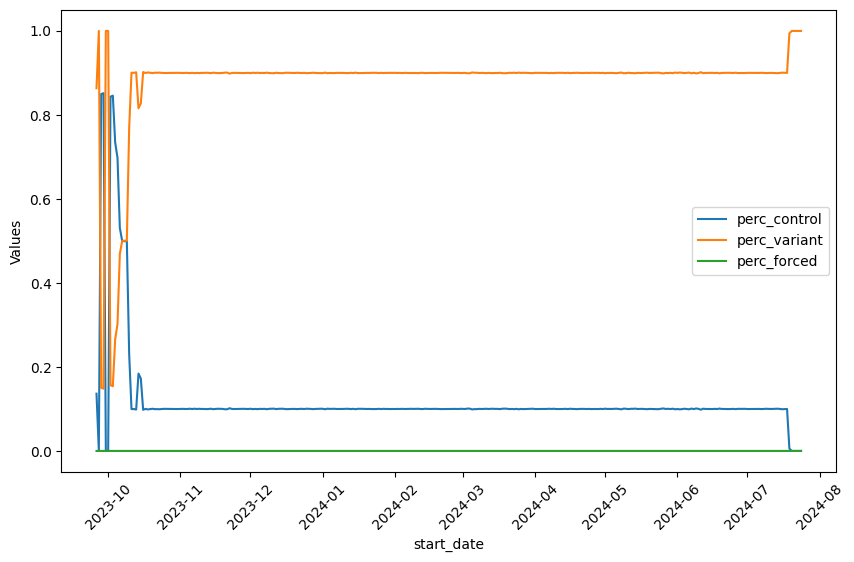

In [13]:
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)
v.multiple_variable_lineplot(
    'start_date',
    ['perc_control','perc_variant','perc_forced']
)

# Comparison Category Opened vs Store Wall even

In [15]:
START_DATE = "'2024-02-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 30

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)}
]

q.prepare_query(
    'nsw_osw_confluence/co_sw_comparison.sql'
    ,params=params
    ,to_load_file='co_sw_comparison'
    ,load_from_to_load_file=None
    
)

df  = q.query_run_starburst()

Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/6e73ee8d5e0468d972c0baa0b2d5b52ca9c7eaf720052c701325cee7e7ccff9b


In [16]:
tmp = df.copy()

In [17]:
df['variant'].unique()

array(['Control Group', None, 'Variant 1', 'forced_assignment'],
      dtype=object)

In [18]:
df['category'].unique()

array(['Shops', 'Health', 'Groceries', 'Food'], dtype=object)

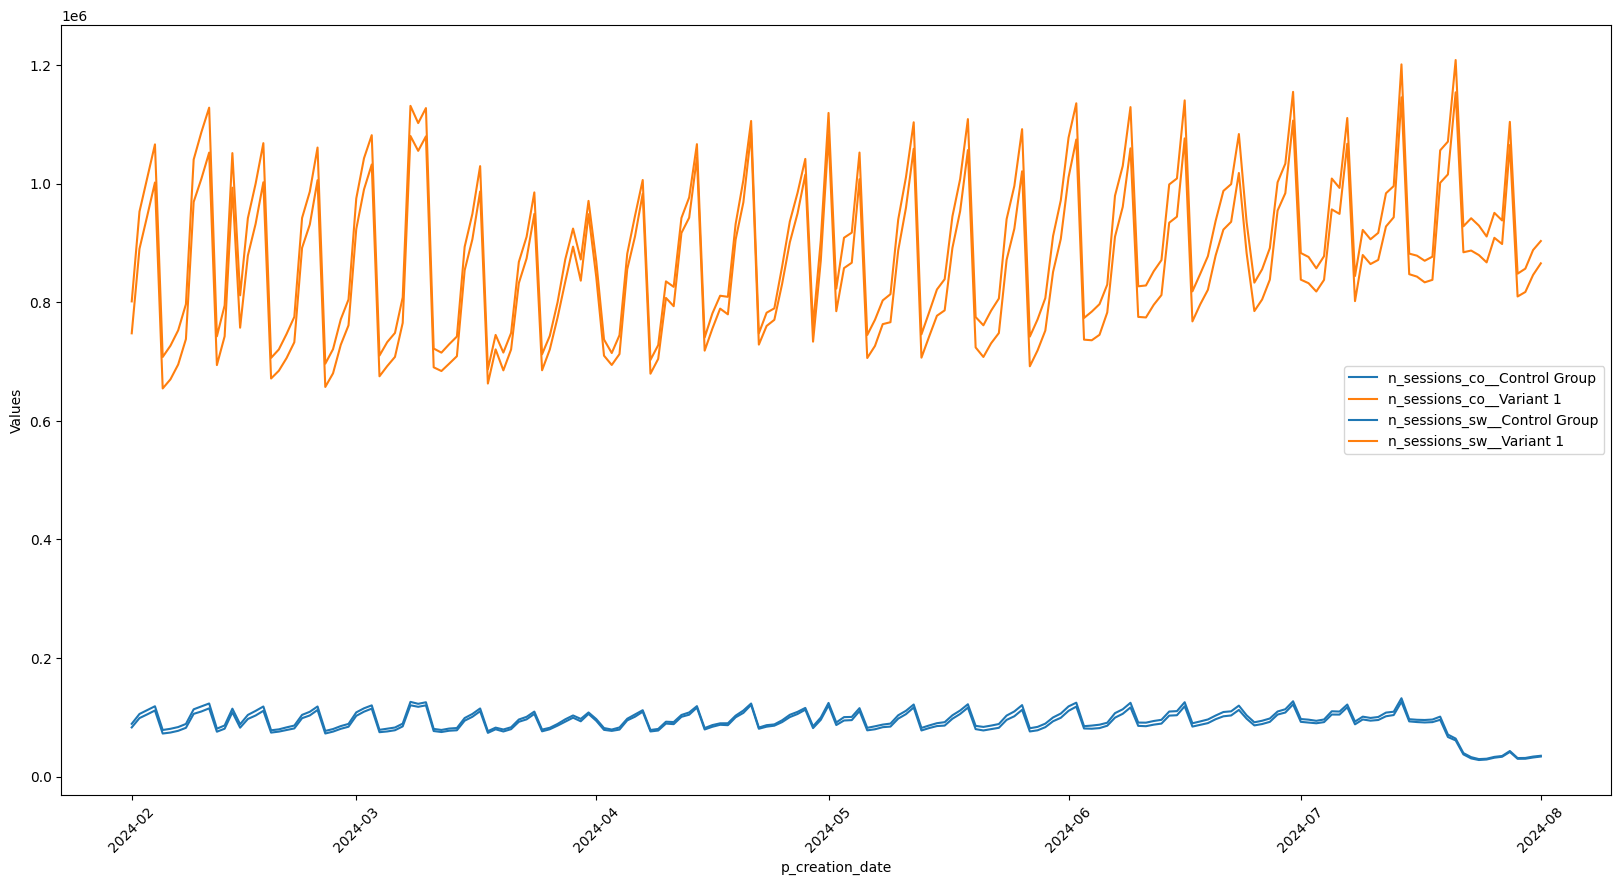

In [19]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Food'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

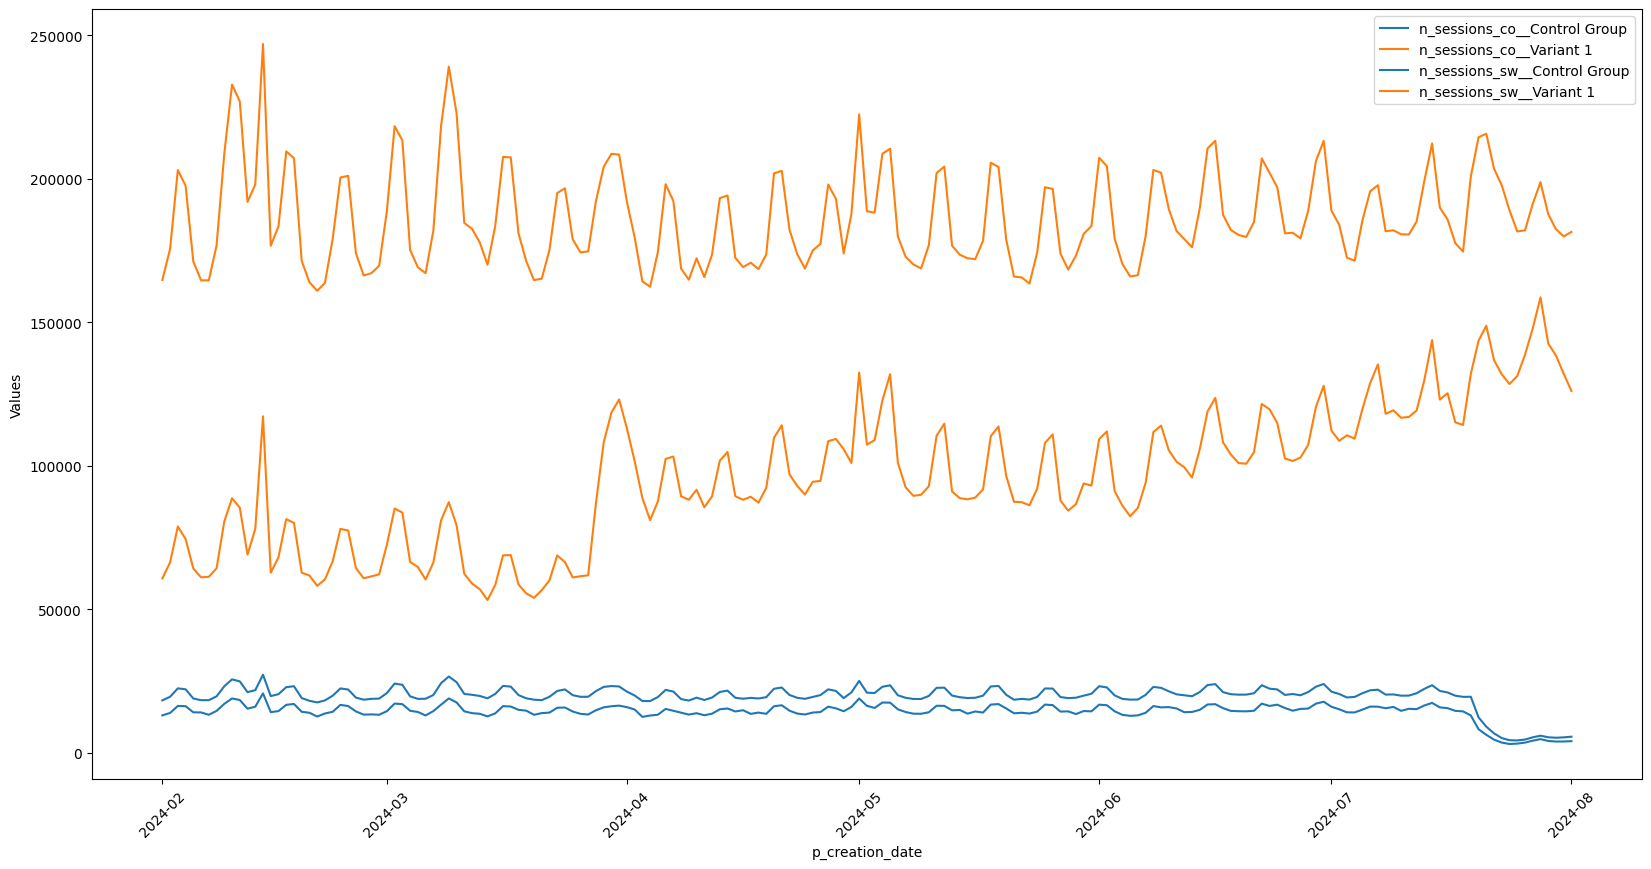

In [20]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

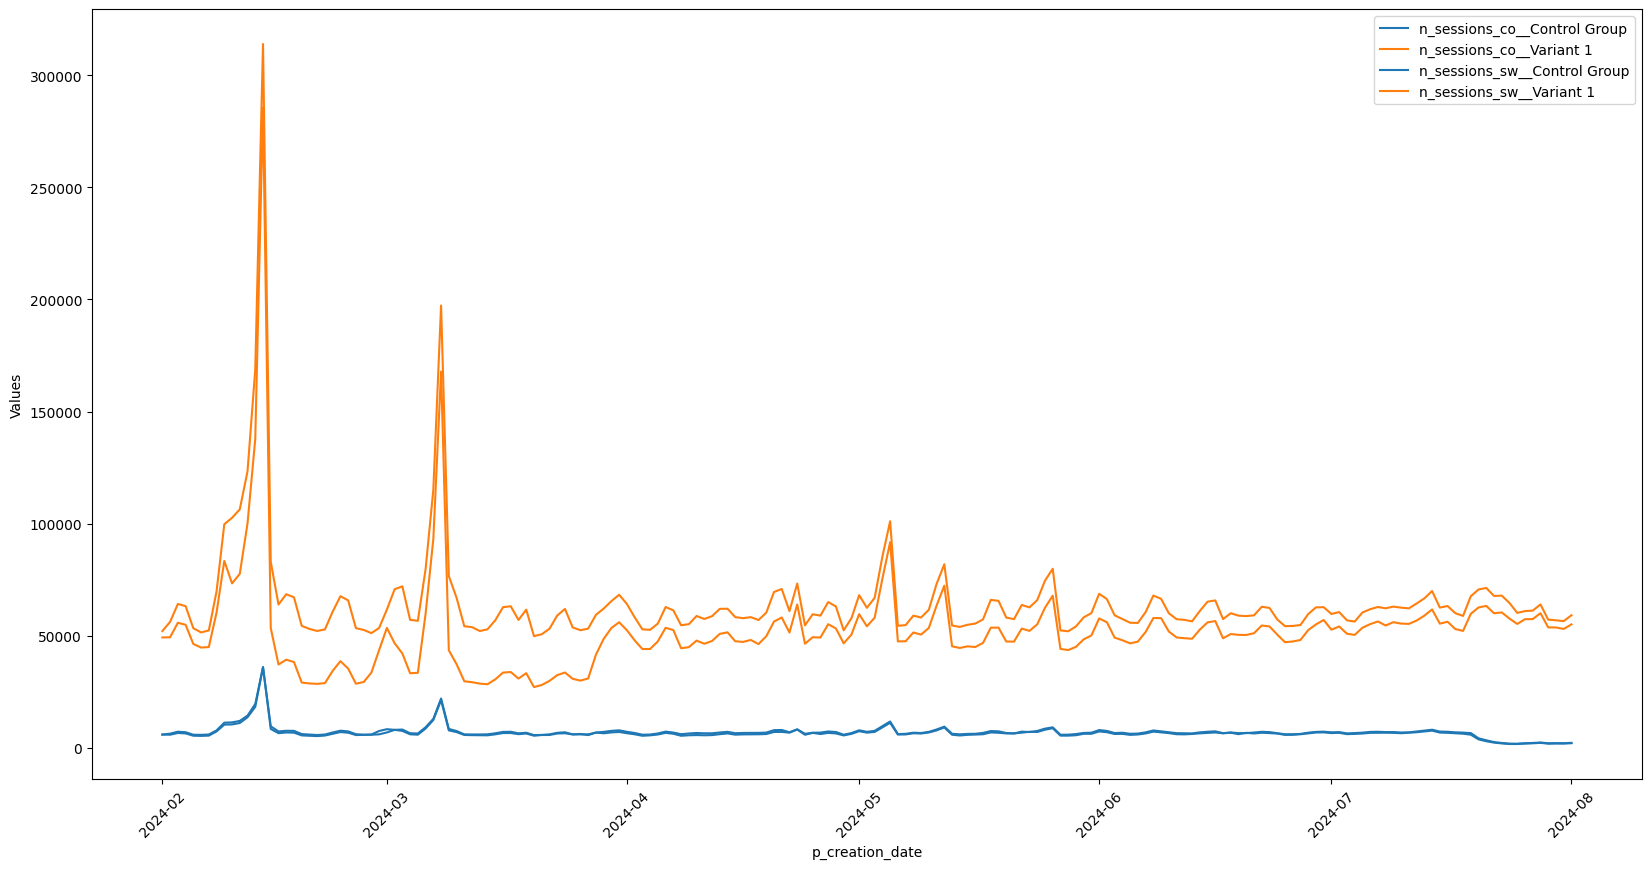

In [21]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Shops'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

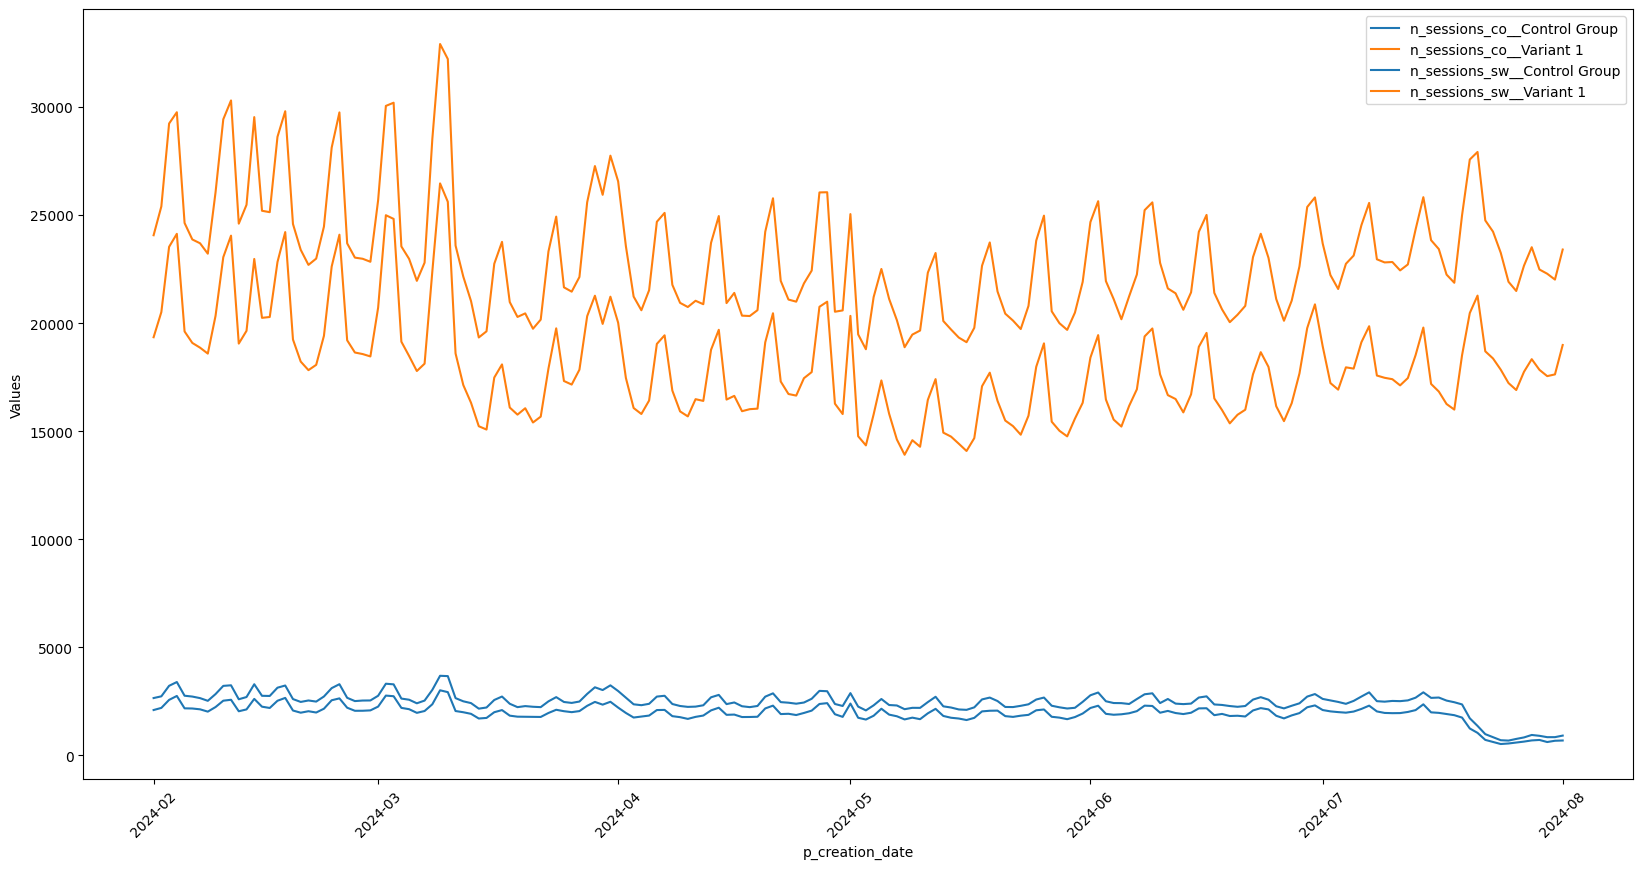

In [22]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Health'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

# Building the funnels

SW to OC
SW to PA 
SW to SA
CO to OC

if possible SW to SA to PA to OC (in brute force or checking order)

### (0) Sanity Check on using SW based, and not CO

In [54]:
START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 30

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)}
]

q.prepare_query(
    'nsw_osw_confluence/funnel_sw_oc.sql'
    ,params=params
    ,to_load_file='funnel_sw_oc'
    ,load_from_to_load_file=None
    
)

df  = q.query_run_starburst()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/7379219f34e42a07a1eb73be661956b362ed49946e5bfc4213ef2e9ccf683246


In [51]:
df['variant'].unique()

array(['Variant 1', None, 'Control Group', 'forced_assignment'],
      dtype=object)

In [52]:
df['category'].unique()

array(['Food', 'Groceries', 'Health', 'Shops', None], dtype=object)

In [53]:
tmp = df.copy()
tmp = tmp.drop(columns=['variant'])

tmp['category'] = tmp['category'].fillna('Undefined')

tmp_grouped = tmp.groupby(['category'])[['n_sessions_sw','n_sessions_orders']].sum().reset_index()
tmp_grouped

,category,n_sessions_sw,n_sessions_orders
0,Food,216105835,89770698
1,Groceries,24810576,7315176
2,Health,4750552,683467
3,Shops,13672506,982368
4,Undefined,26307888,0


In [55]:
tmp_grouped.sum()

category             FoodGroceriesHealthShopsUndefined
n_sessions_sw                                285647357
n_sessions_orders                             98751709
dtype: object

In [56]:
tmp = df.copy()
tmp = tmp.drop(columns=['category'])

tmp['variant'] = tmp['variant'].fillna('Undefined')

tmp_grouped = tmp.groupby(['variant'])[['n_sessions_sw','n_sessions_orders']].sum().reset_index()
tmp_grouped

,variant,n_sessions_sw,n_sessions_orders
0,Control Group,26046540,9485068
1,Undefined,18980536,3215862
2,Variant 1,240620185,86050770
3,forced_assignment,96,9


In [57]:
df

,p_creation_date,category,variant,n_sessions_sw,n_sessions_orders
0,2024-01-01,Food,Variant 1,1177505,345096
1,2024-01-01,Food,None,123605,21292
2,2024-01-01,Food,Control Group,131091,38278
3,2024-01-01,Groceries,Variant 1,92377,14805
4,2024-01-01,Groceries,None,11365,1469
...,...,...,...,...,...
3260,2024-08-01,Shops,Variant 1,55160,4858
3261,2024-08-01,Shops,Control Group,1999,130
3262,2024-08-01,None,Variant 1,33025,0
3263,2024-08-01,None,None,7612,0


In [58]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Food'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_sw','n_sessions_orders'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

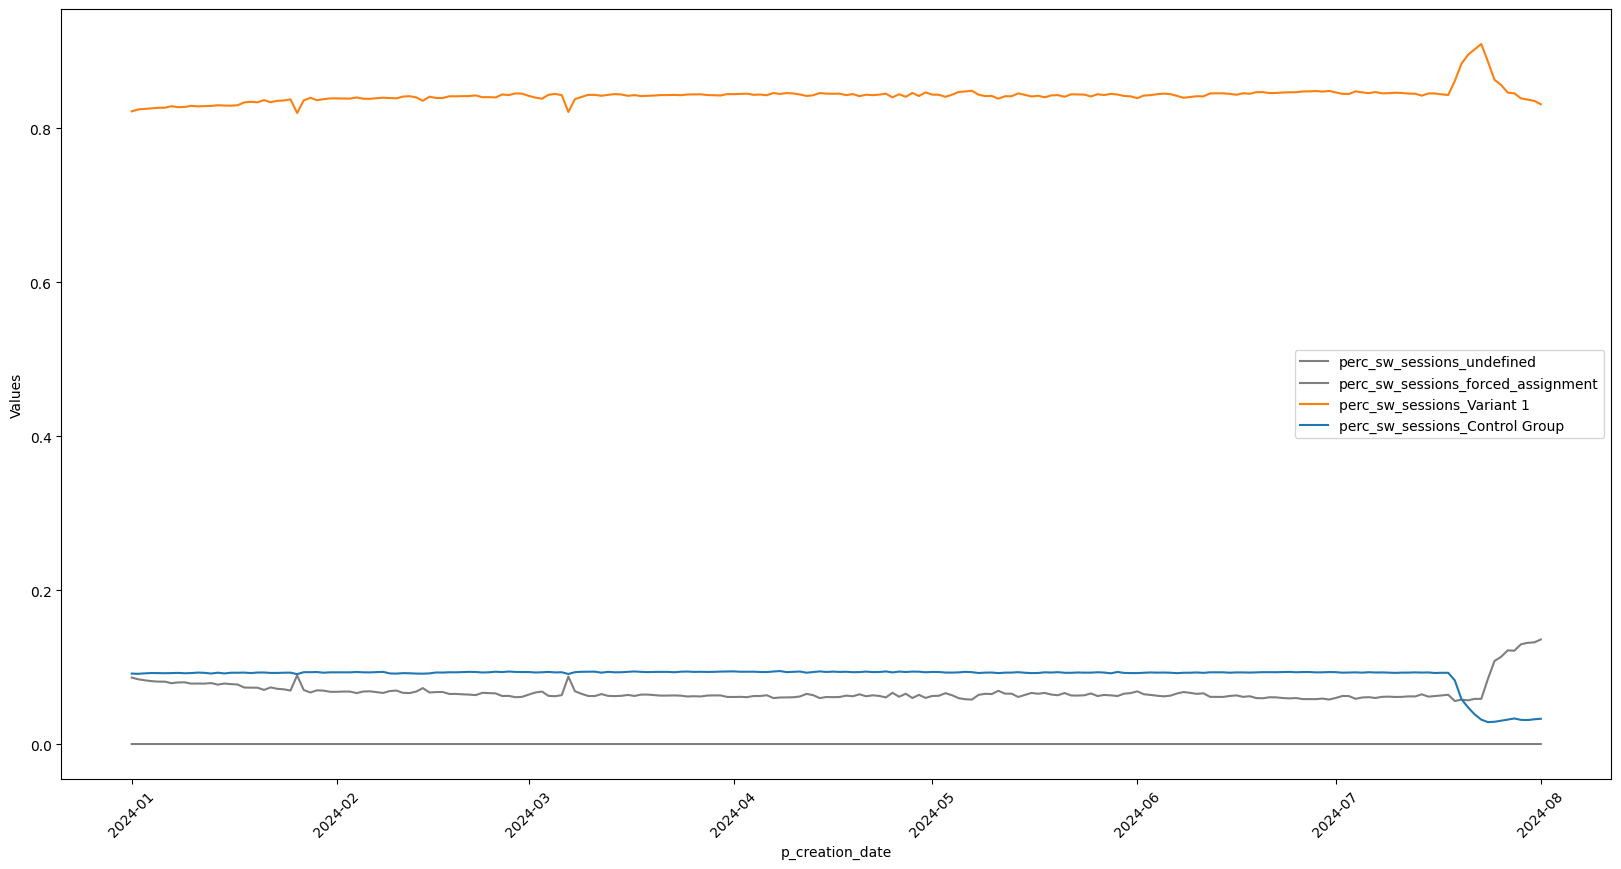

In [59]:
# Distribution between variants

df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__undefined'] + df_pivoted['n_sessions_sw__forced_assignment'] + df_pivoted['n_sessions_sw__Variant 1'] + df_pivoted['n_sessions_sw__Control Group']
df_pivoted['perc_sw_sessions_undefined'] = df_pivoted['n_sessions_sw__undefined']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_forced_assignment'] = df_pivoted['n_sessions_sw__forced_assignment']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['perc_sw_sessions_undefined','perc_sw_sessions_forced_assignment','perc_sw_sessions_Variant 1','perc_sw_sessions_Control Group']
    ,colors=['gray', 'gray', 'orange', 'blue']
)

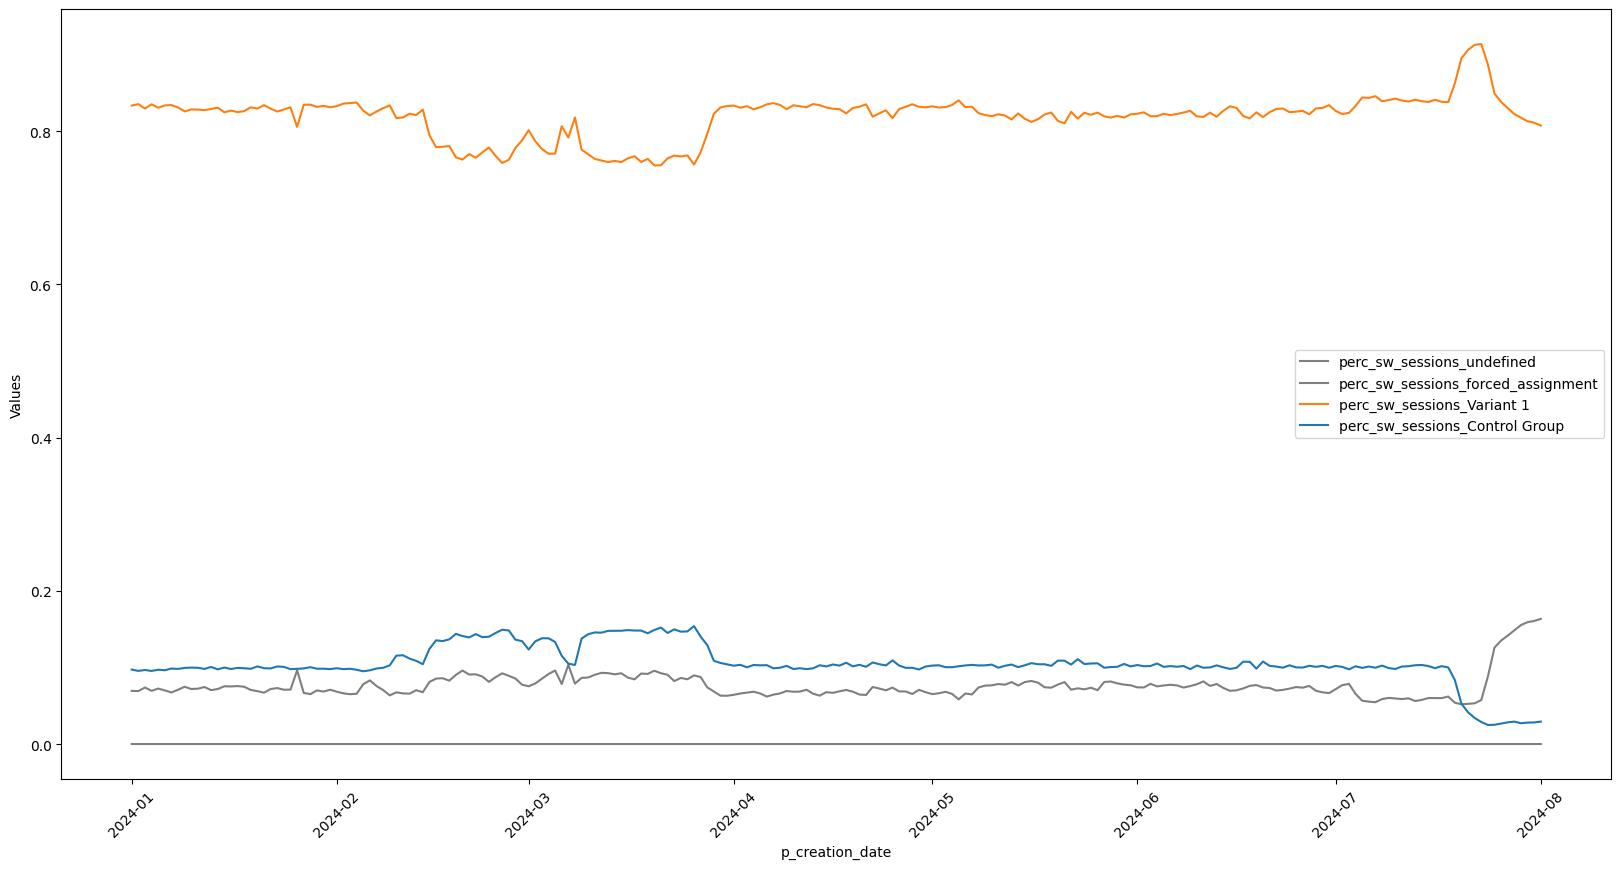

In [63]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Shops'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_sw','n_sessions_orders'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# Distribution between variants

df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__undefined'] + df_pivoted['n_sessions_sw__forced_assignment'] + df_pivoted['n_sessions_sw__Variant 1'] + df_pivoted['n_sessions_sw__Control Group']
df_pivoted['perc_sw_sessions_undefined'] = df_pivoted['n_sessions_sw__undefined']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_forced_assignment'] = df_pivoted['n_sessions_sw__forced_assignment']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['perc_sw_sessions_undefined','perc_sw_sessions_forced_assignment','perc_sw_sessions_Variant 1','perc_sw_sessions_Control Group']
    ,colors=['gray', 'gray', 'orange', 'blue']
)

### (1) Sanity Check on why CVR Groceries

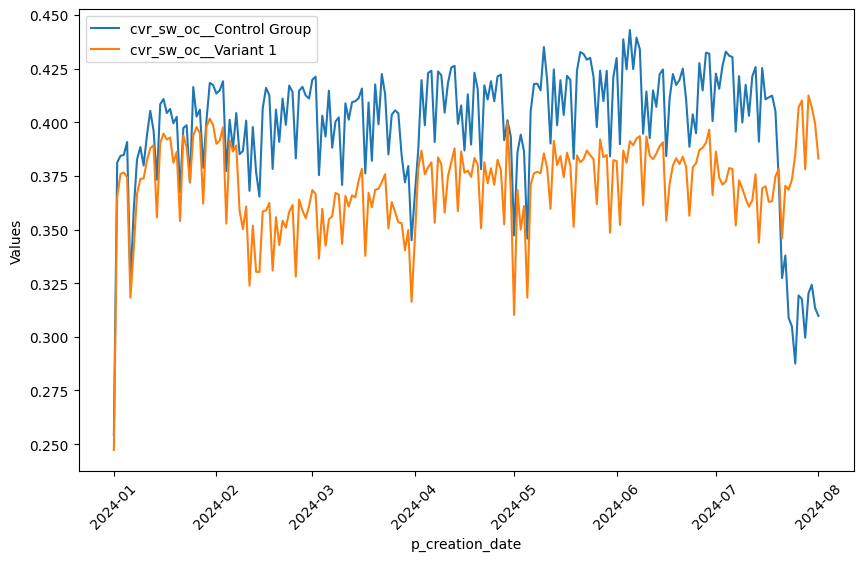

In [56]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'
cond4 = tmp['variant'].isin(['Variant 1','Control Group'])

tmp = tmp[cond1 & cond2 & cond3 & cond4]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_sw','n_sessions_orders'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

df_pivoted['cvr_sw_oc__Control Group'] = df_pivoted['n_sessions_orders__Control Group']/df_pivoted['n_sessions_sw__Control Group']
df_pivoted['cvr_sw_oc__Variant 1'] = df_pivoted['n_sessions_orders__Variant 1']/df_pivoted['n_sessions_sw__Variant 1']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)

v.multiple_variable_lineplot(
    'p_creation_date',
    ['cvr_sw_oc__Control Group','cvr_sw_oc__Variant 1'],
    colors=['blue','orange']
)


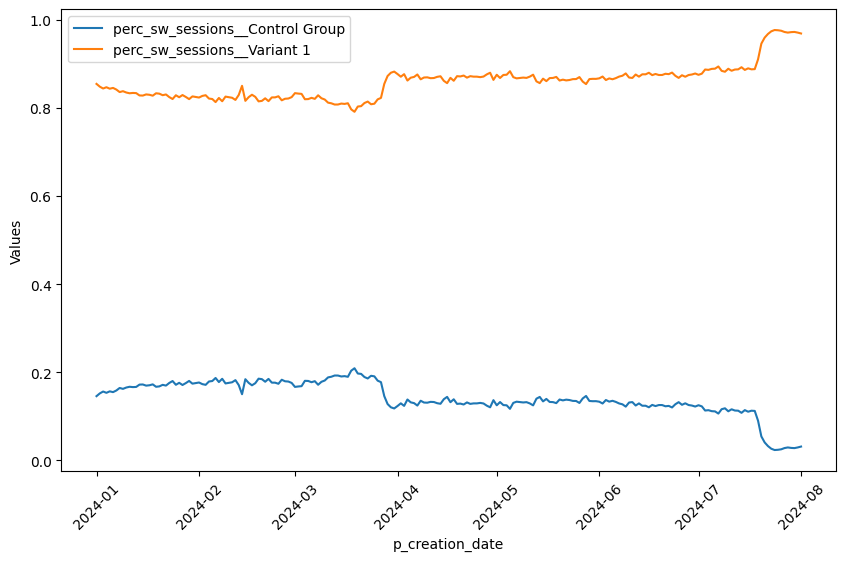

In [38]:
df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__Control Group'] + df_pivoted['n_sessions_sw__Variant 1']
df_pivoted['perc_sw_sessions__Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions__Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']


v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_sw_sessions__Control Group','perc_sw_sessions__Variant 1'],
    colors=['blue','orange']
)


In [39]:
df_pivoted

,p_creation_date,n_sessions_sw__Control Group,n_sessions_sw__Variant 1,n_sessions_orders__Control Group,n_sessions_orders__Variant 1,cvr_sw_oc__Control Group,cvr_sw_oc__Variant 1,total_sw_sessions,perc_sw_sessions__Control Group,perc_sw_sessions__Variant 1
0,2024-01-01,15765,92377,2664,14507,0.168982,0.157041,108142,0.145781,0.854219
1,2024-01-02,15549,86722,4866,25442,0.312946,0.293374,102271,0.152037,0.847963
2,2024-01-03,14480,78177,4574,23805,0.315884,0.304501,92657,0.156275,0.843725
3,2024-01-04,13676,75509,4333,22868,0.316832,0.302851,89185,0.153344,0.846656
4,2024-01-05,15620,84084,5092,25668,0.325992,0.305266,99704,0.156664,0.843336
...,...,...,...,...,...,...,...,...,...,...
209,2024-07-28,4820,159044,997,45420,0.206846,0.285581,163864,0.029415,0.970585
210,2024-07-29,4171,142989,1018,48147,0.244066,0.336718,147160,0.028343,0.971657
211,2024-07-30,3983,138792,1009,45719,0.253327,0.329407,142775,0.027897,0.972103
212,2024-07-31,4013,132405,968,42366,0.241216,0.319973,136418,0.029417,0.970583


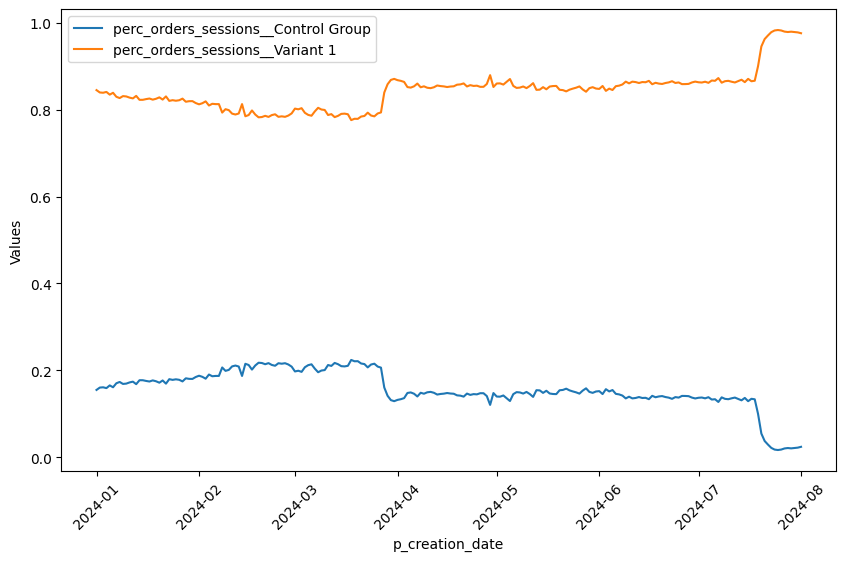

In [40]:
df_pivoted['total_orders_sessions'] = df_pivoted['n_sessions_orders__Control Group'] + df_pivoted['n_sessions_orders__Variant 1']
df_pivoted['perc_orders_sessions__Control Group'] = df_pivoted['n_sessions_orders__Control Group']/df_pivoted['total_orders_sessions']
df_pivoted['perc_orders_sessions__Variant 1'] = df_pivoted['n_sessions_orders__Variant 1']/df_pivoted['total_orders_sessions']


v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_orders_sessions__Control Group','perc_orders_sessions__Variant 1'],
    colors=['blue','orange']
)


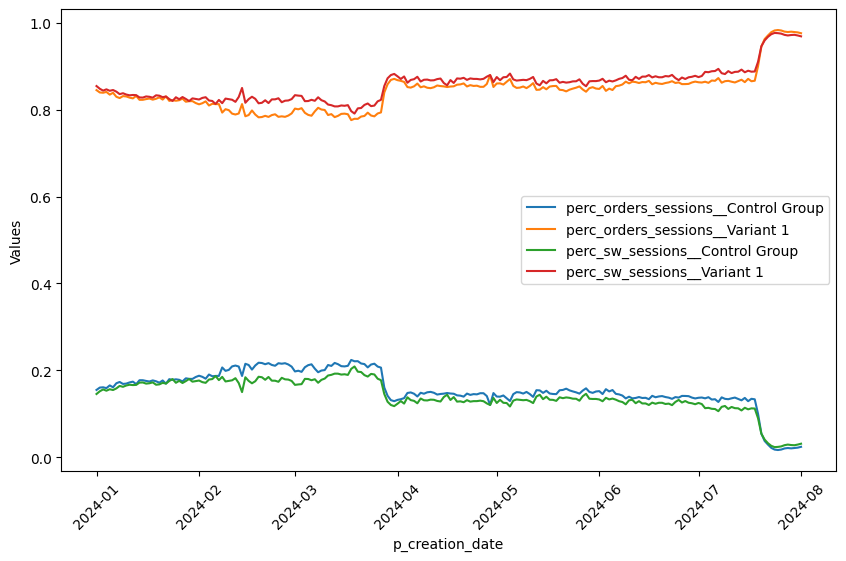

In [41]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_orders_sessions__Control Group','perc_orders_sessions__Variant 1','perc_sw_sessions__Control Group','perc_sw_sessions__Variant 1'],
)


### (2) Sanity Check no why CVR Groceries

In [2]:
START_DATE = "'2024-04-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 30

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)}
]

q.prepare_query(
    'nsw_osw_confluence/funnel_co_sw.sql'
    ,params=params
    ,to_load_file='funnel_co_sw'
    ,load_from_to_load_file='funnel_co_sw'
    
)

df  = q.query_run_starburst()

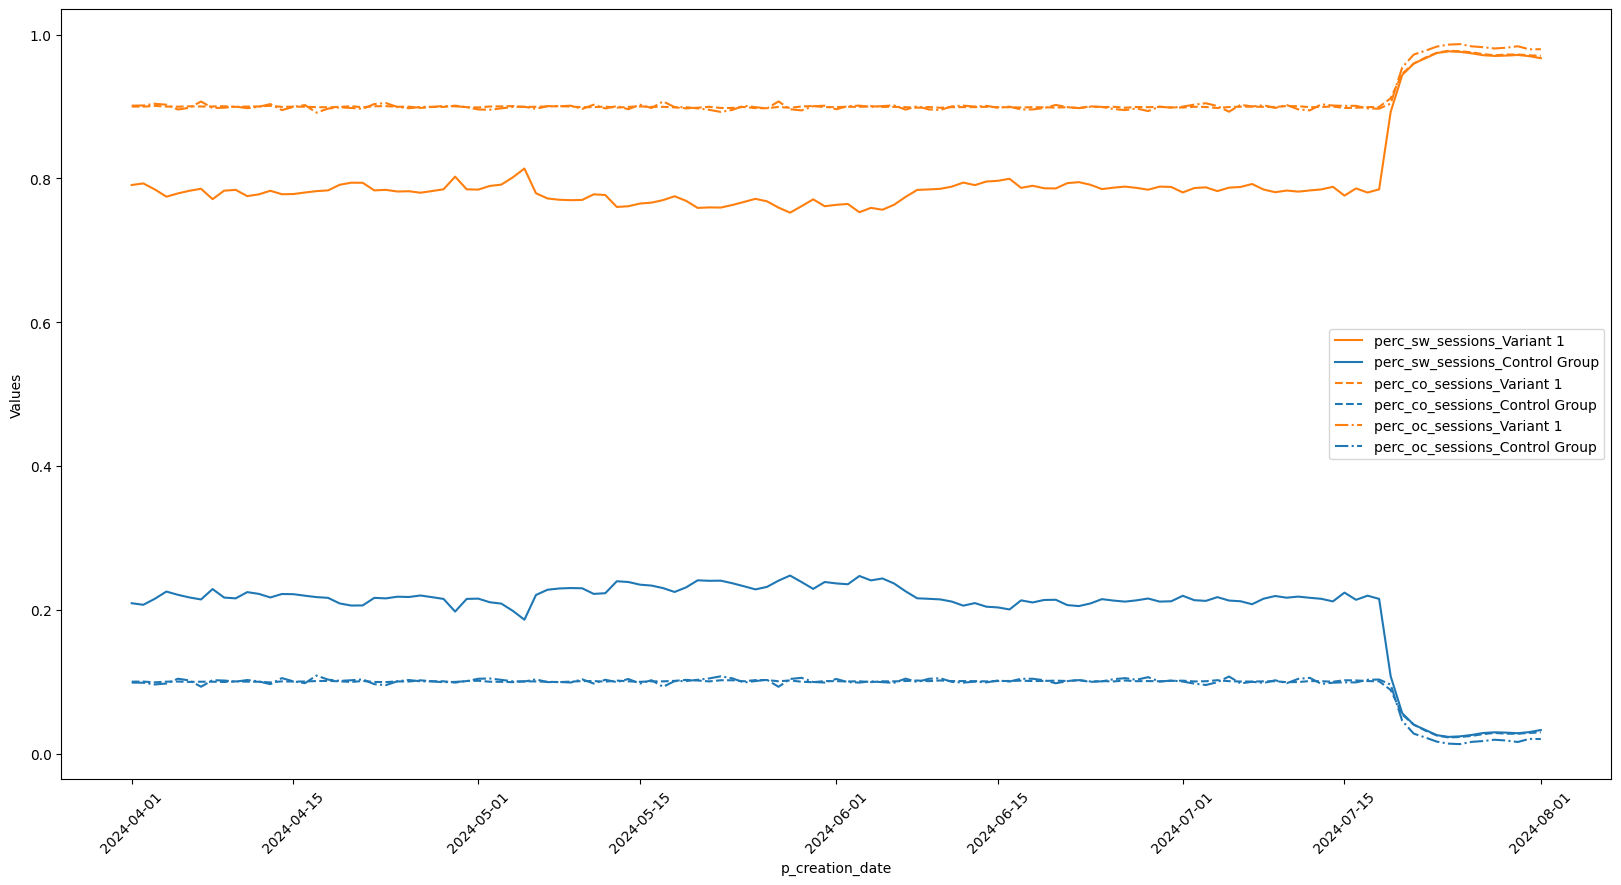

In [3]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond = tmp['category'] == 'Groceries'
cond2 = tmp['variant'].isin(['Control Group','Variant 1'])

tmp = tmp[cond & cond2]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw','n_sessions_oc'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# Distribution between variants

df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__Variant 1'] + df_pivoted['n_sessions_sw__Control Group']
df_pivoted['perc_sw_sessions_Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']

df_pivoted['total_co_sessions'] = df_pivoted['n_sessions_co__Variant 1'] + df_pivoted['n_sessions_co__Control Group']
df_pivoted['perc_co_sessions_Variant 1'] = df_pivoted['n_sessions_co__Variant 1']/df_pivoted['total_co_sessions']
df_pivoted['perc_co_sessions_Control Group'] = df_pivoted['n_sessions_co__Control Group']/df_pivoted['total_co_sessions']

df_pivoted['total_oc_sessions'] = df_pivoted['n_sessions_oc__Variant 1'] + df_pivoted['n_sessions_oc__Control Group']
df_pivoted['perc_oc_sessions_Variant 1'] = df_pivoted['n_sessions_oc__Variant 1']/df_pivoted['total_oc_sessions']
df_pivoted['perc_oc_sessions_Control Group'] = df_pivoted['n_sessions_oc__Control Group']/df_pivoted['total_oc_sessions']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['perc_sw_sessions_Variant 1','perc_sw_sessions_Control Group'
      ,'perc_co_sessions_Variant 1','perc_co_sessions_Control Group'
      ,'perc_oc_sessions_Variant 1','perc_oc_sessions_Control Group']
    ,colors=['orange', 'blue', 'orange', 'blue','orange','blue']
    ,style=['s1','s1','s2','s2','s3','s3']
)